# Understanding Pandas Series and DataFrames - Lab

## Introduction

In this lab, let's get some hands-on practice working with data cleanup using Pandas.

## Objectives
You will be able to:

- Use the `.map()` and `.apply()` methods to apply a function to a pandas Series or DataFrame
- Perform operations to change the structure of pandas DataFrames
- Change the index of a pandas DataFrame
- Change data types of columns in pandas DataFrames

## Let's get started

Import the file `'turnstile_180901.txt'`.

In [11]:
# Import the required libraries
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [12]:
# Import the file 'turnstile_180901.txt'
df = pd.read_csv('https://raw.githubusercontent.com/EarthToJoe/dsc-pandas-series-and-dataframes-lab/refs/heads/master/turnstile_180901.txt')

# Print the number of rows ans columns in df
print(df.shape)

# Print the first five rows of df
df.head()

(197625, 11)


,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS
0,A002,R051,02-00-00,59 ST,NQR456W,BMT,08/25/2018,00:00:00,REGULAR,6736067,2283184
1,A002,R051,02-00-00,59 ST,NQR456W,BMT,08/25/2018,04:00:00,REGULAR,6736087,2283188
2,A002,R051,02-00-00,59 ST,NQR456W,BMT,08/25/2018,08:00:00,REGULAR,6736105,2283229
3,A002,R051,02-00-00,59 ST,NQR456W,BMT,08/25/2018,12:00:00,REGULAR,6736180,2283314
4,A002,R051,02-00-00,59 ST,NQR456W,BMT,08/25/2018,16:00:00,REGULAR,6736349,2283384


Rename all the columns to lower case:

In [13]:
# We can check and see what the columns look like with this code:
df.columns

Index(['C/A', 'UNIT', 'SCP', 'STATION', 'LINENAME', 'DIVISION', 'DATE', 'TIME',
       'DESC', 'ENTRIES',
       'EXITS                                                               '],
      dtype='object')

In [14]:
# Rename all the columns to lower case
df.columns = df.columns.str.lower()

In [15]:
# Now let's check and make sure that worked
df.columns

Index(['c/a', 'unit', 'scp', 'station', 'linename', 'division', 'date', 'time',
       'desc', 'entries',
       'exits                                                               '],
      dtype='object')

Change the index to `'linename'`:

In [16]:
# Change the index to 'linename'
df = df.set_index('linename')

Reset the index:

In [17]:
# Reset the index
df = df.reset_index()

Create another column `'Num_Lines'` that is a count of how many lines pass through a station. Then sort your DataFrame by this column in descending order.

*Hint: According to the [data dictionary](http://web.mta.info/developers/resources/nyct/turnstile/ts_Field_Description.txt), LINENAME represents all train lines that can be boarded at a given station. Normally lines are represented by one character. For example, LINENAME 456NQR represents trains 4, 5, 6, N, Q, and R.*

In [18]:
# Add a new 'num_lines' column
df['num_lines'] = df['linename'].str.len()

Write a function to clean column names:

In [19]:
# Before we start cleaning, let's look at what we've got

df.columns

Index(['linename', 'c/a', 'unit', 'scp', 'station', 'division', 'date', 'time',
       'desc', 'entries',
       'exits                                                               ',
       'num_lines'],
      dtype='object')

In [20]:
df.columns = df.columns.str.upper()
df.columns

Index(['LINENAME', 'C/A', 'UNIT', 'SCP', 'STATION', 'DIVISION', 'DATE', 'TIME',
       'DESC', 'ENTRIES',
       'EXITS                                                               ',
       'NUM_LINES'],
      dtype='object')

In [21]:
def clean(col_name):
    # Clean the column name in any way you want to. Hint: think back to str methods
    cleaned = col_name.lower().replace(' ', '_')
    return cleaned

In [22]:
for col in df.columns:
    clean(col)

df.columns

Index(['LINENAME', 'C/A', 'UNIT', 'SCP', 'STATION', 'DIVISION', 'DATE', 'TIME',
       'DESC', 'ENTRIES',
       'EXITS                                                               ',
       'NUM_LINES'],
      dtype='object')

In [23]:
# Use the above function to clean the column names
for col in df.columns:
    df.rename(columns={col: clean(col)}, inplace=True)

In [24]:
# Check to ensure the column names were cleaned
df.columns

Index(['linename', 'c/a', 'unit', 'scp', 'station', 'division', 'date', 'time',
       'desc', 'entries',
       'exits_______________________________________________________________',
       'num_lines'],
      dtype='object')

- Change the data type of the `'date'` column to a date
- Add a new column `'day_of_week'` that represents the day of the week

In [25]:
# Convert the data type of the 'date' column to a date
df['date'] = pd.to_datetime(df['date'])

# Add a new column 'day_of_week' that represents the day of the week
df['day_of_week'] = df['date'].dt.dayofweek

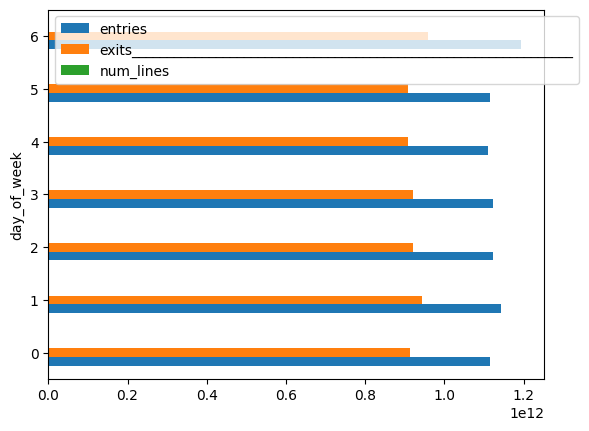

In [26]:
# Group the data by day of week and plot the sum of the numeric columns
grouped = df.groupby('day_of_week').sum(numeric_only = True)
grouped.plot(kind='barh')
plt.show()

- Remove the index of `grouped`
- Print the first five rows of `grouped`

In [27]:
# Reset the index of grouped
grouped = grouped.reset_index()

# Print the first five rows of grouped
print(grouped.head())

   day_of_week        entries  \
0            0  1114237052454   
1            1  1143313287046   
2            2  1123655222441   
3            3  1122723988662   
4            4  1110224700078   

   exits_______________________________________________________________  \
0                                       911938153513                      
1                                       942230721477                      
2                                       920630864687                      
3                                       920691927110                      
4                                       906799065337                      

   num_lines  
0      76110  
1      77303  
2      75713  
3      76607  
4      75573  


Add a new column `'is_weekend'` that maps the `'day_of_week'` column using the dictionary `weekend_map`

In [28]:
# Use this dictionary to create a new column
weekend_map = {0:False, 1:False, 2:False, 3:False, 4:False, 5:True, 6:True}

# Add a new column 'is_weekend' that maps the 'day_of_week' column using weekend_map
grouped['is_weekend'] = grouped['day_of_week'].map(weekend_map)

In [29]:
# Group the data by weekend/weekday and plot the sum of the numeric columns
wkend = grouped.groupby('is_weekend').sum(numeric_only = True)
wkend[['entries', 'exits']].plot(kind='barh')
plt.show()

KeyError: "['exits'] not in index"

Remove the `'c/a'` and `'scp'` columns.

In [ ]:
# Remove the 'c/a' and 'scp' columns
df = None
df.head(2)

## Analysis Question

What is misleading about the day of week and weekend/weekday charts you just plotted?

In [ ]:
# Your answer here

## Summary

You practiced your data cleanup skills using Pandas.